# Working with missing data  

In [3]:
import pandas as pd
from io import StringIO

In [2]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [3]:
csv_data = unicode(csv_data)

In [4]:
df = pd.read_csv(StringIO(csv_data))

In [5]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

# Eliminating samples with missing values   

In [8]:
# drop samples with NaN
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
# drop columns with NaN
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [10]:
# only drop rows where all the columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [12]:
# drop rows that have not at least 4 non-NaN
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [13]:
# only drop rows where Nan appear in specific columns
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


# Imputing missing values

In [4]:
# mean imputation
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

NameError: name 'df' is not defined

# categorical data
---
Nominal vs. ordinal features   
Ordinal: sortable or orderable  
Nominal: not sortable or orderable

In [30]:
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


# Mapping ordinal features  
Most classification algos don't use ordinal info, so map  
those to numerical

In [31]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1}

In [32]:
df['size'] = df['size'].map(size_mapping)

In [33]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [34]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}

In [35]:
inv_size_mapping

{1: 'M', 2: 'L', 3: 'XL'}

# Encoding class labels 
Often require encoding the classes as integers.  
Most algos will do this automatically, but it's good to  
do it by hand. 

In [36]:
import numpy as np

In [37]:
class_mapping = {label:idx for idx, label in 
                 enumerate(np.unique(df['classlabel']))}
class_mapping 

{'class1': 0, 'class2': 1}

In [38]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [39]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [40]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}

In [41]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)

In [42]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


# LabelEncoder

In [45]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

In [46]:
y

array([0, 1, 0])

In [47]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

# One-hot encoding on nominal features

In [49]:
X = df[['color', 'size', 'price']].values

In [50]:
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [51]:
color_le = LabelEncoder()

In [52]:
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

This would make it look like green is bigger than blue and red is bigger than green.  
Not an optimal approach.  
Encode binary dummy variables.  

In [55]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

get_dummies from pandas only converts string columns

In [57]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# Partitioning a dataset into training and test sets

In [ ]:
from pyML.pymldata import wine_data
df_wine = wine_data()

In [5]:
import numpy as np
import pandas as pd

In [6]:
print('Class labels', np.unique(df_wine['Class label']))

('Class labels', array([1, 2, 3]))


In [7]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavinoids,Nonflavinoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
train_test_split(X, y, 
                test_size=0.3,
                random_state=0,
                stratify=y)


In [17]:
df_y = pd.DataFrame(y)

In [19]:
df_y.head()

,0
0,1
1,1
2,1
3,1
4,1


# Feature scaling 

Normalization

x_norm = (x_i - x_min)/(x_max-x_min)

In [21]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [23]:
type(X_train)

numpy.ndarray

Standardization  
x_std = (x_i - u_x)/stdev_x  

In [29]:
ex = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
print('standardized:', (ex - ex.mean() / ex.std()))

('standardized:', array([-1.46385011, -0.46385011,  0.53614989,  1.53614989,  2.53614989,
        3.53614989]))


In [30]:
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

('normalized:', array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]))


In [31]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [32]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [34]:
print X_train_std, X_test_std

[[ 0.71225893  2.22048673 -0.13025864 ..., -0.20017028 -0.82164144
  -0.62946362]
 [ 0.88229214 -0.70457155  1.17533605 ...,  1.33982592  0.54931269
   1.47568796]
 [ 0.84585645 -0.73022996  1.17533605 ...,  1.06806189  0.1308109
   1.62934866]
 ..., 
 [ 1.02803489  2.29746195 -0.5778911  ..., -1.69487249 -1.86068037
  -1.04434751]
 [-1.30384913 -1.08089484 -0.31677217 ...,  0.16218176  0.73691694
   0.40313628]
 [-0.40510216  1.29678411  0.05625489 ...,  1.06806189  0.73691694
  -0.89683324]] [[ 1.09517886 -0.40674741  1.26476181 -0.52362169  0.94557352  1.20882673
   0.89897451  0.32761624  0.40358313  0.59874588  0.67823753  0.45328836
   2.26479759]
 [-0.97853259 -0.8686148   0.73146818  0.0648075   0.18962376 -0.52667205
  -0.21306092  0.79114314 -0.88304429 -0.92743603  1.99301704 -0.49127063
  -1.30945676]
 [ 1.89874205 -0.43753857  0.44704491 -1.29787063 -0.36015788  0.42707052
   0.610273   -0.36767412  0.99741117  0.12039036  0.22628208  1.33037886
   1.96694306]
 [ 0.3564191

# L1 vs. L2 regularization
L2: ||w||^2 = Sum(w_j)^2  
L1: ||w|| = Sum(|w_j|)  
L1 encourages sparsity, while L2 encourages smaller values of weights  

In [35]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

('Training accuracy:', 1.0)
('Test accuracy:', 1.0)


In [40]:
lr.intercept_

array([-1.26290083, -1.21595701, -2.37004236])

This model uses One-versus-rest approach by default, where the first intercept is the model that fits 1 vs 2&3, and so on

In [41]:
lr.coef_

array([[ 1.24531562,  0.18066254,  0.74107969, -1.15892913,  0.        ,
         0.        ,  1.17745164,  0.        ,  0.        ,  0.        ,
         0.        ,  0.53870497,  2.51172871],
       [-1.53729345, -0.38701332, -0.99535098,  0.36496784, -0.05940859,
         0.        ,  0.66776419,  0.        ,  0.        , -1.93398113,
         1.23402093,  0.        , -2.23176915],
       [ 0.13551487,  0.16871168,  0.3571844 ,  0.        ,  0.        ,
         0.        , -2.43761134,  0.        ,  0.        ,  1.5636889 ,
        -0.81892868, -0.49231969,  0.        ]])

Increase sparsity by increasing regularization strengh (lower values of C)

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
         'magenta', 'yellow', 'black',
         'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1',
                           C=10.**c,
                           random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

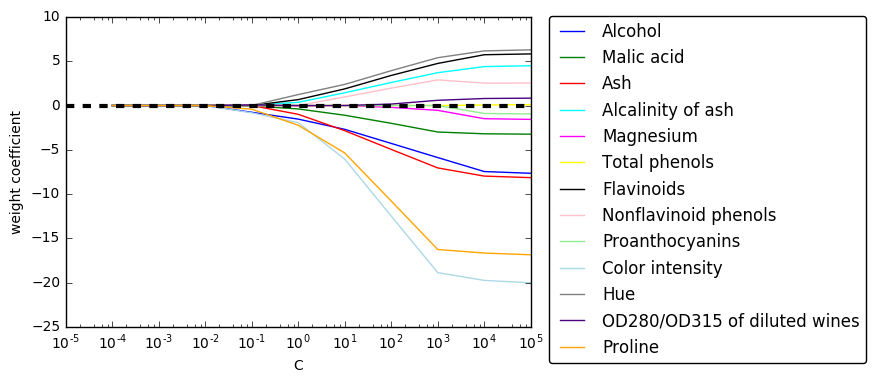

In [51]:
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label=df_wine.columns[column + 1],
            color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38, 1.03),
         ncol=1, fancybox=True)
plt.show()

# Sequential feature selection 
Useful for algos that don't support regularization  
Sequential backward selection (SBS): sequentially removes feature  
that causes the smallest performance hit until you have the desired  
number of features.  

In [52]:
from pyML.tuning_tools import SBS

In [53]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)

In [55]:
sbs = SBS(knn, k_features=1)

In [56]:
sbs.fit(X_train_std, y_train)

<pyML.tuning_tools.SBS instance at 0x11249e878>

In [57]:
k_feat = [len(k) for k in sbs.subsets_]


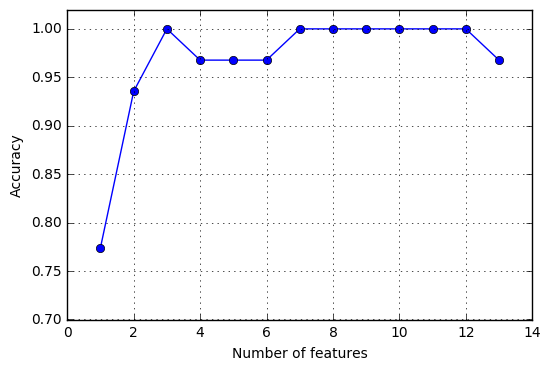

In [58]:
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [61]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index([u'Alcohol', u'Malic acid', u'OD280/OD315 of diluted wines'], dtype='object')


In [62]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))

('Training accuracy:', 0.967741935483871)


In [63]:
print('Test accuracy', knn.score(X_test_std, y_test))

('Test accuracy', 0.98148148148148151)


In [64]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))

('Training accuracy:', 0.95161290322580649)


In [65]:
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

('Test accuracy:', 0.92592592592592593)


# Assessing feature importance with random forests

 1) Proline                        0.185453
 2) Flavinoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavinoid phenols           0.013354
13) Ash                            0.013279


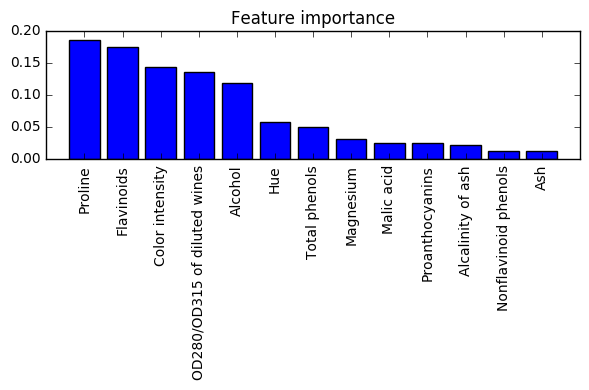

In [76]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
                               random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Select from model 

In [77]:
from sklearn.feature_selection import SelectFromModel

In [78]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:',
     X_selected.shape[0])


('Number of samples that meet this criterion:', 124)


In [81]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavinoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
